In [128]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [129]:
import altair as alt
import pandas as pd

In [130]:
eth_price = pd.read_html('https://coinmarketcap.com/currencies/ethereum/historical-data/', 'Market Cap', parse_dates=[0])[0]

In [131]:
eth_price.head()

,Date,Open*,High,Low,Close**,Volume,Market Cap
0,2018-09-08,217.91,220.37,193.26,197.95,1517200000,22187693065
1,2018-09-07,229.53,233.90,217.07,217.20,1678260000,23366572107
2,2018-09-06,231.65,231.75,218.12,230.22,2097310000,23576873426
3,2018-09-05,286.05,288.16,232.33,232.33,2390390000,29107551074
4,2018-09-04,289.30,291.58,284.25,285.72,1554870000,29432488855


In [132]:
eth_price.rename({'Open*': 'Open', 'Close**': 'Close', 'Market Cap': 'Market_Cap'}, axis='columns', inplace=True)

In [134]:
eth_price.head()

,Date,Open,High,Low,Close,Volume,Market_Cap
0,2018-09-08,217.91,220.37,193.26,197.95,1517200000,22187693065
1,2018-09-07,229.53,233.90,217.07,217.20,1678260000,23366572107
2,2018-09-06,231.65,231.75,218.12,230.22,2097310000,23576873426
3,2018-09-05,286.05,288.16,232.33,232.33,2390390000,29107551074
4,2018-09-04,289.30,291.58,284.25,285.72,1554870000,29432488855


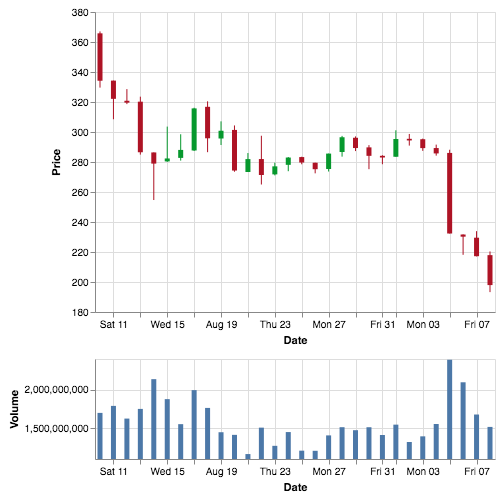

In [139]:
import altair_basic_charting as abc
rule, bar, volume = abc.build_candlestick_charts(eth_price)
rule + bar & volume

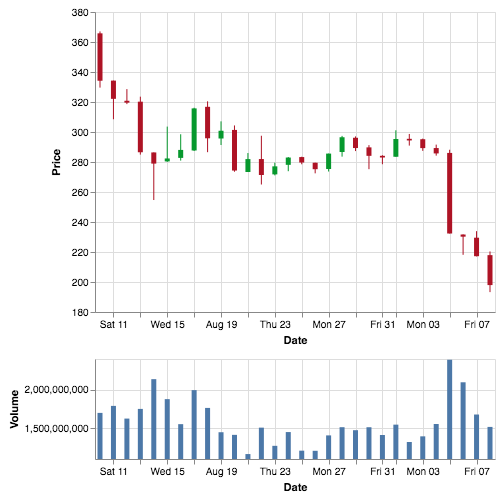

In [146]:
# link panning and zooming on the top plot with the bottom plot, only for X
combined = abc.pan_zoom_vconcat(rule, bar, volume, method=0)
combined

In [148]:
# the resultant spec contains the necessary `resolve` clause as seen in the vega-lite docs:
# https://vega.github.io/vega-lite/docs/bind.html#scale-binding
combined.to_dict()

{'config': {'view': {'width': 400, 'height': 300}},
 'vconcat': [{'layer': [{'data': {'name': 'data-827bdac4a0cbc1e6a4fd672d7a458c27'},
     'mark': 'rule',
     'encoding': {'color': {'condition': {'value': '#06982d',
        'test': 'datum.Open < datum.Close'},
       'value': '#ae1325'},
      'x': {'type': 'temporal', 'field': 'Date'},
      'y': {'type': 'quantitative',
       'axis': {'title': 'Price'},
       'field': 'Low',
       'scale': {'zero': False}},
      'y2': {'type': 'quantitative', 'field': 'High'}},
     'selection': {'selector054': {'type': 'interval',
       'bind': 'scales',
       'encodings': ['x', 'y']}}},
    {'data': {'name': 'data-827bdac4a0cbc1e6a4fd672d7a458c27'},
     'mark': 'bar',
     'encoding': {'color': {'condition': {'value': '#06982d',
        'test': 'datum.Open < datum.Close'},
       'value': '#ae1325'},
      'x': {'type': 'temporal', 'field': 'Date'},
      'y': {'type': 'quantitative', 'field': 'Open'},
      'y2': {'type': 'quantitative',

# Random notes

* Pan and zoom: Had to dig into vega docs to find this.
* Y-Scale: Can't change range to be less than height of view, so could not layer volume chart onto bottom of candlestick chart.